This notebook shows several examples of using the reference columns in the database for adding citations for a paper in latex. 

The first creates a latex table with labeled references.

The second two are latex text blocks with citep for citations.

A bibtex file (data/lvdb.bib) is included in the database with entries

In [1]:
import corner
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.table as table

from collections import Counter

In [2]:
## input for latex table
dsph_mw = table.Table.read('..//data/dwarf_mw.csv')

In [3]:
plt.style.use('../code/std.mplstyle')
import matplotlib as mp
mp.rcParams['text.usetex'] = True

the file data/lvdb.bib includes a bibtex entry with the correct key for almost entry in the databse

there are some missing (that need to be fixed)

interal = value added measurement (this almost all surface brightness measurements)

EDD = Extragalactic Distance Database http://edd.ifa.hawaii.edu/

LVGDB = Local Volume Galaxy Database https://www.sao.ru/lv/lvgdb/ 


In [4]:
import numpy.ma as ma
## use  ~ma.is_masked(  ) to check for empty values 

In [5]:
## this makes a->z plus aa -> zz for labeling citations
import string
string.ascii_lowercase
long_list = list(string.ascii_lowercase)
for i in list(string.ascii_lowercase):
    for j in list(string.ascii_lowercase):
        long_list.append(i+j)

this is more is less a script to make the rows of Table 1 of https://ui.adsabs.harvard.edu/abs/2022ApJ...940..136P/abstract 

this does not include ellipticity or position angle 

currently need to provide the other parts of the table yourself and copy this into your tex file


In [6]:
## this creates each row for a table with the following entries (there are better ways to do this)
## name (key currently)
## ra
## dec
## rhalf (in arcmin and major axis)
## distance (kpc)
## MV
## velocity (or empty if no velocity)
## citations for the previous entries
citations = []
letter = []
for i in range(len(dsph_mw)):

    if ma.is_masked(dsph_mw['vlos_sigma_em'][i])==True and ma.is_masked(dsph_mw['vlos_sigma_ul'][i])==True: 
        str_sigma = ' '
    elif ma.is_masked(dsph_mw['vlos_sigma_ul'][i])==False:
        str_sigma = '$<' + str(dsph_mw['vlos_sigma_ul'][i]) +'$ & '
    else:
        str_sigma ='$'+str(dsph_mw['vlos_sigma'][i])
        if dsph_mw['vlos_sigma_em'][i] == dsph_mw['vlos_sigma_ep'][i]:
            str_sigma+='\\pm'+str(dsph_mw['vlos_sigma_em'][i])+'$'
        else:
            str_sigma+='_{-'+str(dsph_mw['vlos_sigma_em'][i]) + '}_{+' +str(dsph_mw['vlos_sigma_ep'][i]) +'}$'
    
    if ma.is_masked(dsph_mw['vlos_systemic'][i])==True: 
        vlos_string = ' '
    else:
        vlos_string ='$'+str(dsph_mw['vlos_systemic'][i])
        if dsph_mw['vlos_systemic_em'][i] == dsph_mw['vlos_systemic_ep'][i]:
            vlos_string+='\\pm'+str(dsph_mw['vlos_systemic_em'][i])+'$'
        else:
            vlos_string+='_{-'+str(dsph_mw['vlos_systemic_em'][i]) + '}_{+' +str(dsph_mw['vlos_systemic_ep'][i]) +'}$'
    
    letter_to_list = []
    
    ## this adds combines all the citations per object that this table is using
    cite_temp = []
    if ma.is_masked(dsph_mw['ref_structure'][i])== False:
        cite_temp.append(dsph_mw['ref_structure'][i])
    if ma.is_masked(dsph_mw['ref_distance'][i])== False:
        cite_temp.append(dsph_mw['ref_distance'][i])
    if ma.is_masked(dsph_mw['ref_m_v'][i])== False:
        cite_temp.append(dsph_mw['ref_m_v'][i])
    if ma.is_masked(dsph_mw['ref_vlos'][i])== False:
        cite_temp.append(dsph_mw['ref_vlos'][i])
    
    ## unique entries
    cite_temp2 = np.unique(cite_temp)
    
    ## this checks if a citation has already been used and pulls it, otherwise it finds the next letter to assign to a citation 
    for tt in cite_temp2:
        if len(tt)<5:
            continue
        if tt in  citations:
            letter_to_list.append(letter[citations.index(tt)])
        else:
            citations.append(tt)
            letter_to_list.append(long_list[len(letter)])
            letter.append(long_list[len(letter)])

    letter_to_list_string = ""
    if len(letter_to_list)>0:
        for kk in letter_to_list:
            letter_to_list_string+=kk  +','
        letter_to_list_string = letter_to_list_string[:-1]
    
    distance_string = '$'+str(dsph_mw['distance'][i])
    if dsph_mw['distance_em'][i] == dsph_mw['distance_ep'][i]:
        distance_string+='\\pm'+str(dsph_mw['distance_em'][i])+'$'
    else:
        distance_string+='_{-'+str(dsph_mw['distance_em'][i]) + '}_{+' +str(dsph_mw['distance_ep'][i]) +'}$'
        
    MV_string = '$'+str(dsph_mw['M_V'][i])
    if dsph_mw['M_V_em'][i] == dsph_mw['M_V_ep'][i]:
        MV_string+='\\pm'+str(dsph_mw['M_V_em'][i])+'$'
    else:
        MV_string+='_{-'+str(dsph_mw['M_V_em'][i]) + '}_{+' +str(dsph_mw['M_V_ep'][i]) +'}$'
    
    ## output each row of our table, plus the citations at the end of the line
    print(dsph_mw['name'][i] , '&',"{:0.4f}".format(dsph_mw['ra'][i]),'&',"{:0.4f}".format(dsph_mw['dec'][i]),
         '& $', "{:0.2f}".format(dsph_mw['rhalf'][i]),'\\pm',"{:0.2f}".format(dsph_mw['rhalf_em'][i]), '$ & ',
         
         '', distance_string, '& ',
          '', MV_string, ' & ',
         '', vlos_string, '& ',
           str_sigma, ' & ', letter_to_list_string,
          '\\\\')

Antlia II & 143.8079 & -36.6991 & $ 104.60 \pm 8.60 $ &   $124.16523075924093_{-5.04102995650355}_{+5.254353385757696}$ &   $-9.729999999999999\pm0.08$  &   $288.8\pm0.4$ &  $5.98_{-0.36}_{+0.37}$  &  a,b \\
Aquarius II & 338.4813 & -9.3274 & $ 5.10 \pm 0.80 $ &   $107.64652136298349_{-3.4147784236531322}_{+3.5266513651757094}$ &   $-4.359999999999999\pm0.14$  &   $-65.3\pm1.8$ &  $4.7_{-1.2}_{+1.8}$  &  c,d \\
Aquarius III & 357.2180 & -3.4890 & $ 2.10 \pm 0.50 $ &   $85.50667128846841_{-4.223619672058462}_{+4.443086864535061}$ &   $-2.5_{-0.4}_{+0.5}$  &   $-13.1\pm1.0$ &  $<3.5$ &   &  e \\
Bootes I & 210.0200 & 14.5135 & $ 9.97 \pm 0.27 $ &   $66.37430704019089_{-2.4008234919260687}_{+2.4909225942365936}$ &   $-6.02\pm0.25$  &   $101.8\pm0.7$ &  $4.6_{-0.6}_{+0.8}$  &  f,g,h \\
Bootes II & 209.5141 & 12.8553 & $ 3.17 \pm 0.42 $ &   $41.68693834703355_{-1.1360848021951213}_{+1.1679136927103642}$ &   $-2.9400000000000013\pm0.25$  &   $-130.4_{-1.1}_{+1.4}$ &  $2.9_{-1.2}_{+1.6}$  &  

In [7]:
## this is the list of citationsm for the table above
for i,j in zip(letter, citations):
#     print(i, j)
    print( "("+i+") \citet{"+j+"}",)

(a) \citet{Ji2021ApJ...921...32J}
(b) \citet{Vivas2022ApJ...926...78V}
(c) \citet{Bruce2023ApJ...950..167B}
(d) \citet{Torrealba2016MNRAS.463..712T}
(e) \citet{Cerny2024arXiv241000981C}
(f) \citet{DallOra2006ApJ...653L.109D}
(g) \citet{Koposov2011ApJ...736..146K}
(h) \citet{Munoz2018ApJ...860...66M}
(i) \citet{Walsh2008ApJ...688..245W}
(j) \citet{Carlin2009ApJ...702L...9C}
(k) \citet{Carlin2018ApJ...865....7C}
(l) \citet{Correnti2009MNRAS.397L..26C}
(m) \citet{Moskowitz2020ApJ...892...27M}
(n) \citet{Homma2019PASJ...71...94H}
(o) \citet{Homma2024PASJ...76..733H}
(p) \citet{Cerny2023ApJ...953....1C}
(q) \citet{Smith2023AJ....166...76S}
(r) \citet{Kuehn2008ApJ...674L..81K}
(s) \citet{Simon2007ApJ...670..313S}
(t) \citet{Greco2008ApJ...675L..73G}
(u) \citet{Karczmarek2015AJ....150...90K}
(v) \citet{Walker2009AJ....137.3100W}
(w) \citet{Li2018ApJ...857..145L}
(x) \citet{Torrealba2018MNRAS.475.5085T}
(y) \citet{Heiger2024ApJ...961..234H}
(z) \citet{MartinezVazquez2021AJ....162..253M}
(aa) \

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
/var/folders/xw/lxf9f3tx4z519xl72nm3_nn00000gn/T/ipykernel_93792/1876708039.py:4: SyntaxWarning: invalid escape sequence '\c'
  print( "("+i+") \citet{"+j+"}",)


In [8]:
## size - luminosity plot again

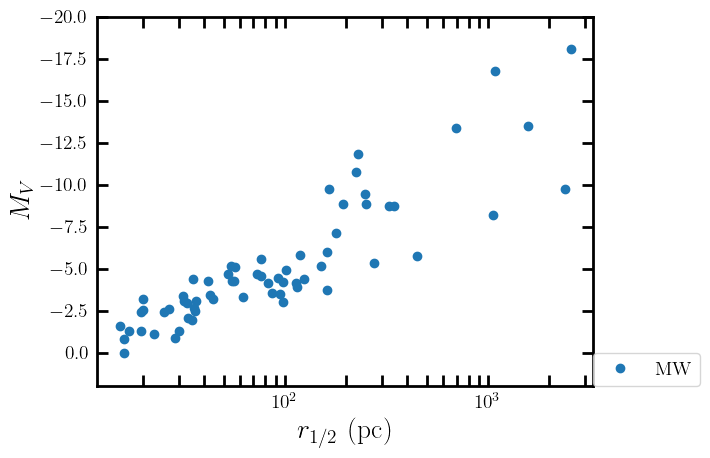

In [9]:
plt.errorbar(dsph_mw['rhalf_sph_physical'], dsph_mw['M_V'], fmt='o', label=r'${\rm MW}$', )

plt.gca().set_xscale('log')
plt.gca().invert_yaxis()
plt.gca().set_xlabel(r'$r_{1/2}~({\rm pc})$')
plt.gca().set_ylabel(r'$M_V$')
plt.legend(loc=(1,0))
plt.ylim(2, -20)
plt.show()

In [10]:
## this creates latex citep for each dwarf galaxy that is input for the  rhalf and MV plot above
## of course for a publication 
for i in range(len(dsph_mw)):

    ## this adds combines all the citations per object that this table is using
    cite_temp = []
    if ma.is_masked(dsph_mw['ref_structure'][i]) == False:
        cite_temp.append(dsph_mw['ref_structure'][i])
    if ma.is_masked(dsph_mw['ref_distance'][i])== False:
        cite_temp.append(dsph_mw['ref_distance'][i])
    if ma.is_masked(dsph_mw['ref_m_v'][i])== False:
        cite_temp.append(dsph_mw['ref_m_v'][i])
    
    ## unique entries
    cite_temp2 = np.unique(cite_temp)
    out =''
    for temp in cite_temp2:
        out+=temp+', '
        
    print(dsph_mw['name'][i], "\\citep{"+out[:-2]+"}" +',')

Antlia II \citep{Ji2021ApJ...921...32J, Vivas2022ApJ...926...78V},
Aquarius II \citep{Torrealba2016MNRAS.463..712T},
Aquarius III \citep{Cerny2024arXiv241000981C},
Bootes I \citep{DallOra2006ApJ...653L.109D, Munoz2018ApJ...860...66M},
Bootes II \citep{Munoz2018ApJ...860...66M, Walsh2008ApJ...688..245W},
Bootes III \citep{Carlin2018ApJ...865....7C, Correnti2009MNRAS.397L..26C, Moskowitz2020ApJ...892...27M},
Bootes IV \citep{Homma2019PASJ...71...94H, Homma2024PASJ...76..733H},
Bootes V \citep{Cerny2023ApJ...953....1C},
Canes Venatici I \citep{Kuehn2008ApJ...674L..81K, Munoz2018ApJ...860...66M},
Canes Venatici II \citep{Greco2008ApJ...675L..73G, Munoz2018ApJ...860...66M},
Carina \citep{Karczmarek2015AJ....150...90K, Munoz2018ApJ...860...66M},
Carina II \citep{Torrealba2018MNRAS.475.5085T},
Carina III \citep{Torrealba2018MNRAS.475.5085T},
Centaurus I \citep{MartinezVazquez2021AJ....162..253M, Mau2020ApJ...890..136M},
Cetus II \citep{DrlicaWagner2015ApJ...813..109D},
Cetus III \citep{Homma2

In [11]:
## everything in one \citep{} for reference 
citations_total = []
for i in range(len(dsph_mw)):
    
    letter_to_list = []
    
    ## this adds combines all the citations per object that this table is using
    cite_temp = []
    if ma.is_masked(dsph_mw['ref_structure'][i])== False:
        cite_temp.append(dsph_mw['ref_structure'][i])
    if ma.is_masked(dsph_mw['ref_distance'][i])== False:
        cite_temp.append(dsph_mw['ref_distance'][i])
    if ma.is_masked(dsph_mw['ref_m_v'][i])== False:
        cite_temp.append(dsph_mw['ref_m_v'][i])
    
    ## unique entries
    cite_temp2 = np.unique(cite_temp)
    
    for tt in cite_temp2:
        if tt not in  citations_total:
            citations_total.append(tt)
out =''
for temp in citations_total:
    out+=temp+', '
print("\\citep{"+out[:-2]+"}" +',')

\citep{Ji2021ApJ...921...32J, Vivas2022ApJ...926...78V, Torrealba2016MNRAS.463..712T, Cerny2024arXiv241000981C, DallOra2006ApJ...653L.109D, Munoz2018ApJ...860...66M, Walsh2008ApJ...688..245W, Carlin2018ApJ...865....7C, Correnti2009MNRAS.397L..26C, Moskowitz2020ApJ...892...27M, Homma2019PASJ...71...94H, Homma2024PASJ...76..733H, Cerny2023ApJ...953....1C, Kuehn2008ApJ...674L..81K, Greco2008ApJ...675L..73G, Karczmarek2015AJ....150...90K, Torrealba2018MNRAS.475.5085T, MartinezVazquez2021AJ....162..253M, Mau2020ApJ...890..136M, DrlicaWagner2015ApJ...813..109D, Homma2018PASJ...70S..18H, Carlin2017AJ....154..267C, Musella2009ApJ...695L..83M, Torrealba2016MNRAS.459.2370T, Bhardwaj2024AJ....167..247B, Longeard2018MNRAS.480.2609L, Crnojevic2016ApJ...824L..14C, MartinezVazquez2021MNRAS.508.1064M, Cerny2021ApJ...920L..44C, Oakes2022ApJ...929..116O, Wang2019ApJ...881..118W, Cantu2021ApJ...916...81C, MartinezVazquez2019MNRAS.490.2183M, Simon2020ApJ...892..137S, MutluPakdil2020ApJ...902..106M, Koposo